# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
### First Code Cell ###
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file = 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
#X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
#assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Second Code Cell ###
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
#n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train) + 1    # Add one to account for indexing

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

13


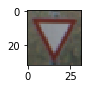

In [3]:
### Third Code Cell ###
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

#importing some useful packages
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

def visualize(X_visual, y_visual):
    
    # X_visual & y_visual are used so that the
    # user can input train, valid, or test 
    
    index = random.randint(0, len(X_visual))
    image = X_visual[index].squeeze()

    plt.figure(figsize=(1,1))
    plt.imshow(image)         # Shown in color
    print(y_visual[index])
    
    return

visualize(X_train, y_train)


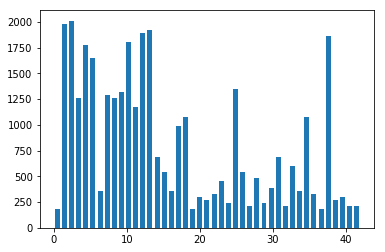

In [4]:
### Fourth Code Cell ###
# histogram of label frequency in training set
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

I converted to grayscale for two reasons. 1) to reduce test time since initial depth is lower and 2) darker images can get better visibility. Number 2 was proven by [Neta Zmora](https://github.com/netaz) in her repository.

In [5]:
### Fifth Code Cell ###
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

### Shuffling the training data
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)


### Setting up TensorFlow and initializing epoch and batch size
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 100


### Convert to grayscale - to reduce train/validation/test time
X_train = np.sum(X_train/3, axis=3, keepdims=True)
#X_valid = np.sum(X_valid/3, axis=3, keepdims=True)
X_test = np.sum(X_test/3, axis=3, keepdims=True)


### Normalizing to try to get to "well-conditioned" level
X_train = (X_train - 128)/128
#X_valid = (X_valid - 128)/128
X_test = (X_test - 128)/128

----

## Step 2a: Get More Data

Translate (shift image), Scale, Warp (twist/rotate image), and randomize brightness.

This seemed to give greater accuracy for [Jeremy Shannon](https://github.com/jeremy-shannon/). The hope is by creating more examples of sign images that originally had relatively few examples in the train set, there will be greater accuracy during validation.

In [6]:
### Sixth Code Cell ###
import cv2

### Define Translation, Scaling, Warping, and Brightening transforms

def translate(img):
    rows, cols, _ = img.shape
    
    # allow translation up to px pixels in x and y directions
    px = 2
    dx,dy = np.random.randint(-px,px,2)

    M = np.float32([[1,0,dx],[0,1,dy]])
    dst = cv2.warpAffine(img,M,(cols,rows))
    
    translated = dst[:,:,np.newaxis]
    
    return translated

def scale(img):   
    rows = img.shape[0]
    cols = img.shape[1]

    # transform limits
    px = np.random.randint(-2,2)

    # ending locations
    pts1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])

    # starting locations (4 corners)
    pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])

    # Just like our warp perspective on roads
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(img,M,(rows,cols))
    
    scaled = dst[:,:,np.newaxis]
    
    return scaled


def warp(img):
    rows, cols, _ = img.shape

    # random scaling coefficients
    rndx = np.random.rand(3) - 0.5
    rndx *= cols * 0.06   # this coefficient determines the degree of warping/twist
    rndy = np.random.rand(3) - 0.5
    rndy *= rows * 0.06

    # 3 starting points for transform, 1/4 way from edges
    x1 = cols/4
    x2 = 3*cols/4
    y1 = rows/4
    y2 = 3*rows/4

    pts1 = np.float32([[y1,x1],
                       [y2,x1],
                       [y1,x2]])
    pts2 = np.float32([[y1+rndy[0],x1+rndx[0]],
                       [y2+rndy[1],x1+rndx[1]],
                       [y1+rndy[2],x2+rndx[2]]])

    M = cv2.getAffineTransform(pts1,pts2)
    dst = cv2.warpAffine(img,M,(cols,rows))
    
    warped = dst[:,:,np.newaxis]
    
    return warped

def brighten(img):
    shifted = img + 1.0   # shift to (0,2) range
    img_max_value = max(shifted.flatten())
    
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.1
    
    coef = np.random.uniform(min_coef, max_coef)
    distorted = shifted * coef - 1.0
    
    return distorted

In [7]:
### Seventh Code Cell ###
### Updating the Training set to provide more examples of lower sign counts (y_train)

print('Before - Number of Labels: {}'.format(y_train.shape))

# Initialize new matrix
input_indices = []
output_indices = []

for class_n in range(n_classes):
    # Printing help visualize the computer's "thought speed"
    print(class_n, ': ', end='')
    class_indices = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
    if n_samples < 1000:
        for i in range(1000 - n_samples):
            input_indices.append(class_indices[0][i%n_samples])
            output_indices.append(X_train.shape[0])
            new_image = X_train[class_indices[0][i % n_samples]]
            new_image = translate(scale(warp(brighten(new_image))))
            X_train = np.concatenate((X_train, [new_image]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)
            if i % 50 == 0:
                print('|', end='')
            elif i % 10 == 0:
                print('-',end='')
        #print(X_train.shape)
        #print(new_image.shape)
    print('')
    
print('After - Number of Labels: {}'.format(y_train.shape))

Before - Number of Labels: (34799,)
0 : |----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|-
1 : 
2 : 
3 : 
4 : 
5 : 
6 : |----|----|----|----|----|----|----|----|----|----|----|----|---
7 : 
8 : 
9 : 
10 : 
11 : 
12 : 
13 : 
14 : |----|----|----|----|----|----|
15 : |----|----|----|----|----|----|----|----|----|
16 : |----|----|----|----|----|----|----|----|----|----|----|----|---
17 : |
18 : 
19 : |----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|-
20 : |----|----|----|----|----|----|----|----|----|----|----|----|----|----
21 : |----|----|----|----|----|----|----|----|----|----|----|----|----|----|--
22 : |----|----|----|----|----|----|----|----|----|----|----|----|----|-
23 : |----|----|----|----|----|----|----|----|----|----|----
24 : |----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|
25 : 
26 : |----|----|----|----|----|----|----|----|----|
27 : |----|----|----|----|----|----|----|----|----|----

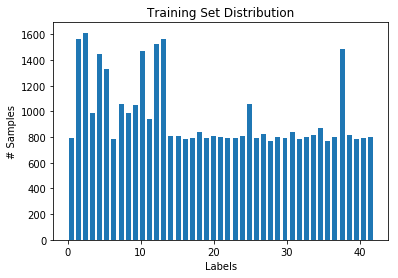

In [48]:
### Eighth Code Cell ###
# Updated! histogram of label frequency in training set
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)

# Add title and axis names
plt.title('Training Set Distribution')
plt.xlabel('Labels')
plt.ylabel('# Samples')

plt.show()

### Model Architecture

In [10]:
### Ninth Code Cell ###
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def TrafficSigns_LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # Define the filter weights `F_W` and filter bias `F_b`.
    # NOTE: Remember to wrap them in `tf.Variable`, they are trainable parameters after all.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding = 'VALID') + conv1_b
    
    # TODO: Activation.
    first_convoluted = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    # Set the ksize (filter size) for each dimension (batch_size, height, width, depth)
    ksize1 = [1, 2, 2, 1]
    # Set the stride for each dimension (batch_size, height, width, depth)
    strides1 = [1, 2, 2, 1]
    # https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#max_pool
    first_pool = tf.nn.max_pool(first_convoluted, ksize1, strides1, padding = 'VALID')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    # Define the filter weights `F_W` and filter bias `F_b`.
    # NOTE: Remember to wrap them in `tf.Variable`, they are trainable parameters after all.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(first_pool, conv2_W, strides=[1, 1, 1, 1], padding = 'VALID') + conv2_b
    
    # TODO: Activation.
    second_convoluted = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    # Set the ksize (filter size) for each dimension (batch_size, height, width, depth)
    ksize2 = [1, 2, 2, 1]
    # Set the stride for each dimension (batch_size, height, width, depth)
    strides2 = [1, 2, 2, 1]
    # https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#max_pool
    second_pool = tf.nn.max_pool(second_convoluted, ksize2, strides2, padding = 'VALID')
    second_layer = second_pool    
    
    ## CHANGE: Layer 3: Squeeze one more convolutional with Output = 1x1x400, so we can concatenate
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(400))
    conv3   = tf.nn.conv2d(second_pool, conv3_W, strides=[1, 1, 1, 1], padding = 'VALID') + conv3_b
    
    ## CHANGE: 3rd Convolution Activation
    third_convoluted = tf.nn.relu(conv3)
    
    ## CHANGE: Flatten.
    # Input = 1x1x400. Output = 400.
    flattened1 = flatten(third_convoluted)
    # Input = 5x5x16. Output = 400.
    flattened2 = flatten(second_layer)
    
    ## CHANGE: Finally going for the concatenate. Output should be 800.
    flattened = tf.concat([flattened1, flattened2], 1)
    
    # CHANGE: Try out a dropout - see what that does
    flattened = tf.nn.dropout(flattened, keep_prob)
    
    # TODO: Layer 4: Fully Connected. Input = 800. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(flattened, fc1_W) + fc1_b
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)

    # TODO: Layer 5: Fully Connected. Input = 120. Output = 43.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 43), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc1, fc2_W) + fc2_b
        
    return logits

## One-hot Encoding & Initializing

In [11]:
### Tenth Code Cell ###
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline

In [12]:
### Eleventh Code Cell ###
rate = 0.001

logits = TrafficSigns_LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation

Evaluate how well the loss and accuracy of the model for a given dataset is.

In [13]:
### Twelfth Code Cell ###
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

This structure lends itself to needing validation split from the training set everytime an iteration of the program is made.

In [14]:
### Thirteenth Code Cell ###
## Split validation dataset off from training dataset

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

print("New X_train size:",len(X_train))
print("X_validation size:",len(X_valid))

New X_train size: 41352
X_validation size: 10338


In [39]:
### Fourteenth Code Cell ###
## Save the new training and validation data

aug_train = {'features': X_train,
             'labels': y_train}
aug_valid = {'features': X_valid,
             'labels': y_valid}
aug_test = {'features': X_test,
             'labels': y_test}
pickle.dump(aug_train, open( "./augmented_data/aug_train.p", "wb" ) )
pickle.dump(aug_valid, open( "./augmented_data/aug_valid.p", "wb" ) )
pickle.dump(aug_test, open( "./augmented_data/aug_test.p", "wb" ) )

print('Saved')

Saved


In [40]:
### Fifteenth Code Cell ###
# Load the previously augmented data
import pickle

training_file = "./augmented_data/aug_train.p"
validation_file = "./augmented_data/aug_valid.p"
testing_file = "./augmented_data/aug_test.p"

with open(training_file, mode='rb') as f:
    aug_train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    aug_valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    aug_test = pickle.load(f)
    
# Remember, this has already gone through image preprocessing
X_train, y_train = aug_train['features'], aug_train['labels']
X_valid, y_valid = aug_valid['features'], aug_valid['labels']
X_test, y_test = aug_test['features'], aug_test['labels']

print("Loaded")

Loaded


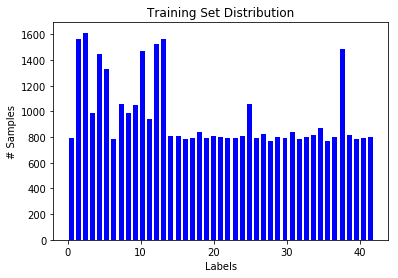

In [45]:
### Sixteenth Code Cell ###
# The pre-split/loaded histogram of label frequency in training set
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color = "blue", lw=0)

# Add title and axis names
plt.title('Training Set Distribution')
plt.xlabel('Labels')
plt.ylabel('# Samples')

plt.show()

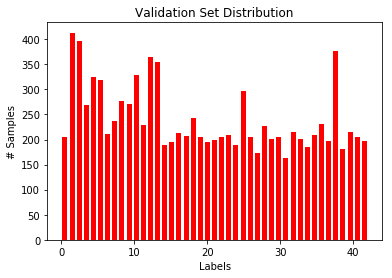

In [47]:
### Seventeenth Code Cell ###
# The pre-split/loaded histogram of label frequency in validation set
hist, bins = np.histogram(y_valid, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color = "red", lw=0)

# Add title and axis names
plt.title('Validation Set Distribution')
plt.xlabel('Labels')
plt.ylabel('# Samples')

plt.show()

In [15]:
### Eighteenth Code Cell ###
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

### Training...
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        
### Validatiing...
        
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    if validation_accuracy >= 0.97:
            print('Great Job! You beat Facebook!')
    
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.883

EPOCH 2 ...
Validation Accuracy = 0.935

EPOCH 3 ...
Validation Accuracy = 0.960

EPOCH 4 ...
Validation Accuracy = 0.973

EPOCH 5 ...
Validation Accuracy = 0.979

EPOCH 6 ...
Validation Accuracy = 0.978

EPOCH 7 ...
Validation Accuracy = 0.984

EPOCH 8 ...
Validation Accuracy = 0.987

EPOCH 9 ...
Validation Accuracy = 0.985

EPOCH 10 ...
Validation Accuracy = 0.986

EPOCH 11 ...
Validation Accuracy = 0.988

EPOCH 12 ...
Validation Accuracy = 0.987

EPOCH 13 ...
Validation Accuracy = 0.990

EPOCH 14 ...
Validation Accuracy = 0.990

EPOCH 15 ...
Validation Accuracy = 0.990

EPOCH 16 ...
Validation Accuracy = 0.989

EPOCH 17 ...
Validation Accuracy = 0.990

EPOCH 18 ...
Validation Accuracy = 0.990

EPOCH 19 ...
Validation Accuracy = 0.990

EPOCH 20 ...
Validation Accuracy = 0.991

EPOCH 21 ...
Validation Accuracy = 0.991

EPOCH 22 ...
Validation Accuracy = 0.989

EPOCH 23 ...
Validation Accuracy = 0.989

EPOCH 24 ...
Validation Accura

In [16]:
### Nineteenth Code Cell ###
### Now Test the accuracy of the model with the test dataset

### Testing...
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet.meta')
    saver2.restore(sess, "./lenet")
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print()
        
    if test_accuracy >= 0.97:
            print('Great Job! You beat Facebook!')


INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.938



---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(5, 32, 32, 3)


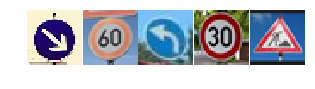

In [19]:
### Twentieth Code Cell ###
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#reading in an image
import glob
import matplotlib.image as mpimg

fig, axs = plt.subplots(1,5, figsize=(5, 1))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

newest_images = []

for i, img in enumerate(glob.glob('german_signs/pic*.png')):
    image = cv2.imread(img)
    axs[i].axis('off')
    axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    newest_images.append(image)

newest_images_rgb = np.asarray(newest_images)

# Grayscale
newest_images_gry = np.sum(newest_images_rgb/3, axis=3, keepdims=True)

# Normalized
newest_images_norm = (newest_images_gry - 128)/128 

print(newest_images_rgb.shape)

### Predict the Sign Type for Each Image

In [33]:
### Twenty-first Code Cell ###
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# Set labels for accuracy
newest_labels = [38, 3, 34, 1, 25]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    
    # Displaying Accuracy
    new_accuracy = evaluate(newest_images_norm, newest_labels)
    print("5 Sign Test Set Accuracy = {:.3f}".format(new_accuracy))
    


INFO:tensorflow:Restoring parameters from ./lenet
5 Sign Test Set Accuracy = 1.000


### Analyze Performance

In [34]:
### Twenty-second Code Cell ###
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

new_accuracy_percent = new_accuracy * 100

print("Model Accuracy = {:.1f}%".format(new_accuracy_percent))

Model Accuracy = 100.0%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./lenet


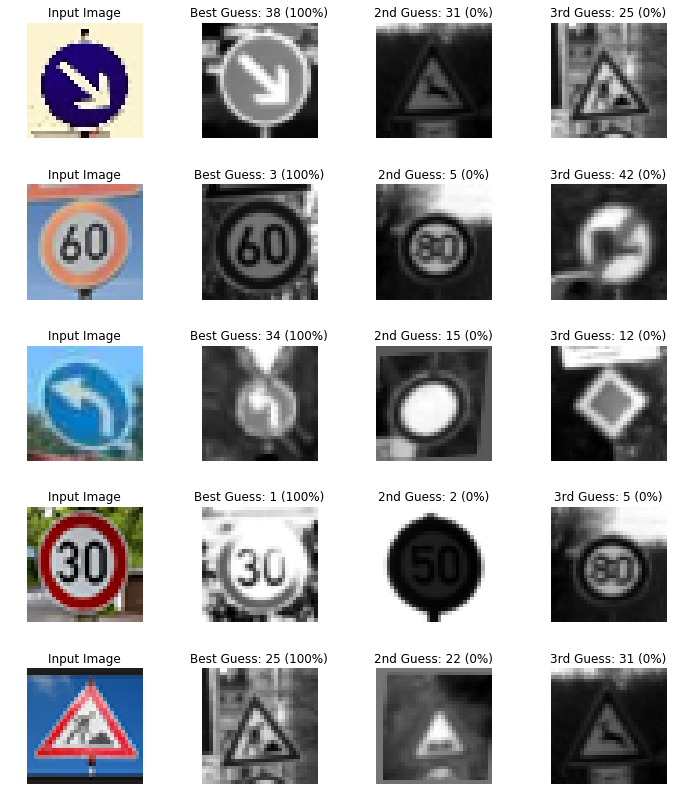

In [49]:
### Twenty-third Code Cell ###
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

softmaxified = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmaxified, k=3) #number of guesses: 3


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    softmax_logits = sess.run(softmaxified, feed_dict={x: newest_images_norm, keep_prob: 1.0})
    top_k = sess.run(top_k, feed_dict={x: newest_images_norm, keep_prob: 1.0})

    
    fig, axs = plt.subplots(len(newest_images),4, figsize=(12, 14))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()

    for i, image in enumerate(newest_images_rgb):
        axs[4*i].axis('off')
        axs[4*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[4*i].set_title('Input Image')
        
        guess1 = top_k[1][i][0]
        index1 = np.argwhere(y_valid == guess1)[0]
        axs[4*i+1].axis('off')
        axs[4*i+1].imshow(X_valid[index1].squeeze(), cmap='gray')
        axs[4*i+1].set_title('Best Guess: {} ({:.0f}%)'.format(guess1, 100*top_k[0][i][0]))
        
        guess2 = top_k[1][i][1]
        index2 = np.argwhere(y_valid == guess2)[0]
        axs[4*i+2].axis('off')
        axs[4*i+2].imshow(X_valid[index2].squeeze(), cmap='gray')
        axs[4*i+2].set_title('2nd Guess: {} ({:.0f}%)'.format(guess2, 100*top_k[0][i][1]))
        
        guess3 = top_k[1][i][2]
        index3 = np.argwhere(y_valid == guess3)[0]
        axs[4*i+3].axis('off')
        axs[4*i+3].imshow(X_valid[index3].squeeze(), cmap='gray')
        axs[4*i+3].set_title('3rd Guess: {} ({:.0f}%)'.format(guess3, 100*top_k[0][i][2]))

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understanding the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")